In [80]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


gdal.UseExceptions()


In [100]:
# Load and process your NDVI data
image_path1 = gdal.Open("C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2019-01-14.tif")
band1 = image_path1.GetRasterBand(1)
ndvi1 = band1.ReadAsArray()
ndvi_processed_1 = np.nan_to_num(ndvi1, nan=0.01)

image_path2 = gdal.Open("C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2023-01-23.tif")
band2 = image_path2.GetRasterBand(1)
ndvi2 = band2.ReadAsArray()
ndvi_processed_2 = np.nan_to_num(ndvi2, nan=0.01)

In [ ]:
''' high vegetation = 21_14
    zero vegetation = 15_23
'''

In [94]:
sub_image1 = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\sub_images\\RUH_2018-12-15_15_23.npy"
sub_image2 = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\sub_images\\RUH_2023-12-19_15_23.npy"

ndvi_processed_1 = np.load(sub_image1)
ndvi_processed_2 = np.load(sub_image2)

In [101]:


def categorize_change(value):
    # 6 positive levels
    if 0 < value <= 1/12:
        return 1
    elif 1/12 < value <= 2/12:
        return 2
    elif 2/12 < value <= 3/12:
        return 3
    elif 3/12 < value <= 4/12:
        return 4
    elif 4/12 < value <= 5/12:
        return 5
    elif 5/12 < value <= 1/2:
        return 6
    # 6 negative levels
    elif -1/12 <= value < 0:
        return -1
    elif -2/12 <= value < -1/12:
        return -2
    elif -3/12 <= value < -2/12:
        return -3
    elif -4/12 <= value < -3/12:
        return -4
    elif -5/12 <= value < -4/12:
        return -5
    elif -1/2 <= value < -5/12:
        return -6
    # Ensure a return value for value == 0
    else:
        return 0

# Calculating and categorizing changes
threshold = 0.111
change_detection = np.where((ndvi_processed_1 > threshold) | (ndvi_processed_2 > threshold),
                            ndvi_processed_2 - ndvi_processed_1, 0)
categorize_change_vectorized = np.vectorize(categorize_change)
categorized_changes = categorize_change_vectorized(change_detection)

# Separate positive and negative changes
positive_changes = np.where(categorized_changes > 0, categorized_changes, 0)
negative_changes = np.where(categorized_changes < 0, categorized_changes, 0)

In [102]:
# Define color maps                                    #
positive_colors = ['black', '#0A1A05', '#1B450D', '#286613', '#2C7316', '#318019', '#48BA24']
negative_colors = ['#FF0000', '#CC0000', '#A10000', '#7A0000', '#3B0000', '#1C0000', 'black']
positive_cmap = ListedColormap(positive_colors)
negative_cmap = ListedColormap(negative_colors)

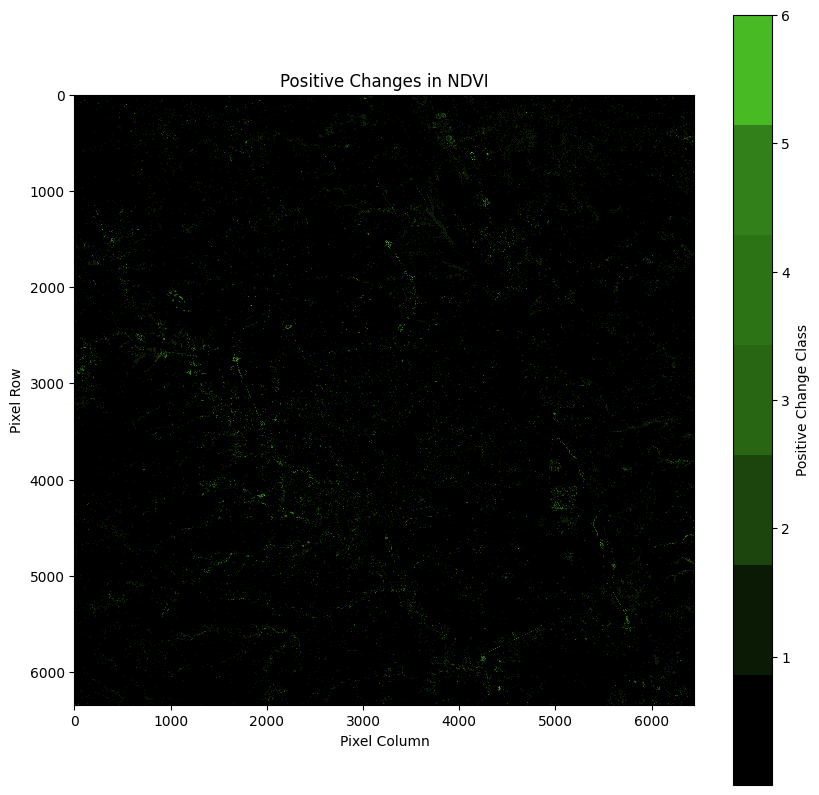

In [103]:
# Plot positive changes
plt.figure(figsize=(10, 10))
plt.imshow(positive_changes, cmap=positive_cmap, interpolation='nearest')
plt.colorbar(ticks=np.arange(1, 7), label='Positive Change Class')
plt.title('Positive Changes in NDVI')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()

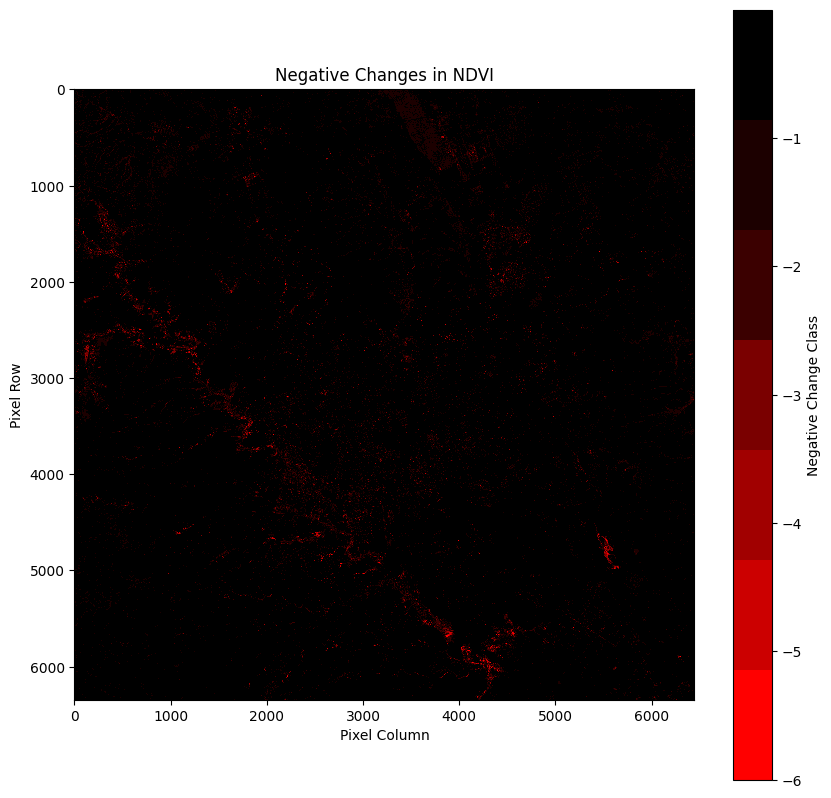

In [104]:
# Plot negative changes
plt.figure(figsize=(10, 10))
plt.imshow(negative_changes, cmap=negative_cmap, interpolation='nearest')
plt.colorbar(ticks=np.arange(-6, 0), label='Negative Change Class')
plt.title('Negative Changes in NDVI')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()

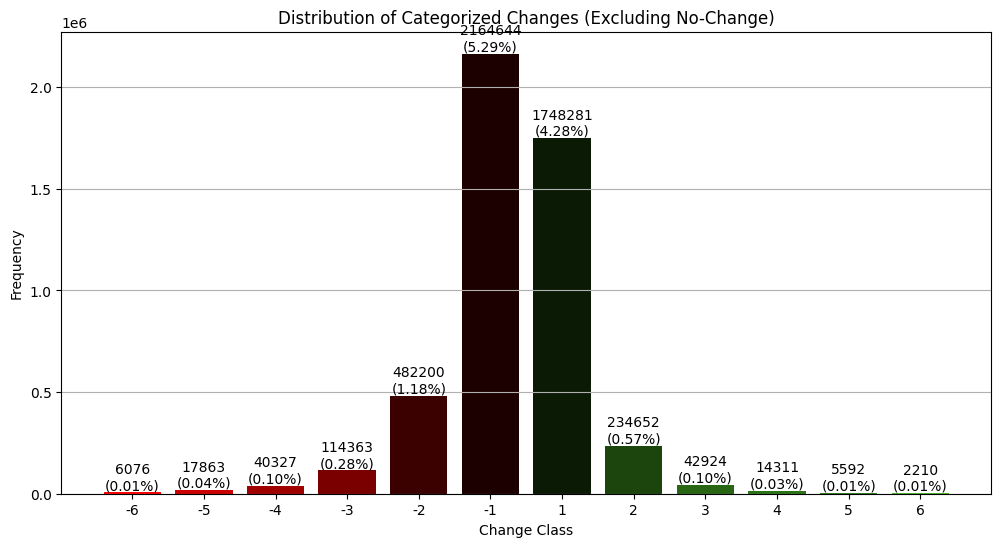

In [105]:
# Calculate the distribution of categorized changes
(unique, counts) = np.unique(categorized_changes, return_counts=True)
frequencies = dict(zip(unique, counts))
total_pixels = np.sum(counts)

# Prepare the data for plotting, excluding the 'no-change' class
categories = ['-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4', '5', '6']
counts = [frequencies.get(i, 0) for i in range(-6, 7) if i != 0]


# Define a color for each category, ensuring there's a distinct color for each level of change
colors = ['#FF0000', '#CC0000', '#A10000', '#7A0000', '#3B0000', '#1C0000', # Negative changes: dark to light red
          '#0A1A05', '#1B450D', '#286613', '#2C7316', '#318019', '#48BA24'] # Positive changes: light to dark green

# Plotting the distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, counts, color=colors)
plt.xlabel('Change Class')
plt.ylabel('Frequency')
plt.title('Distribution of Categorized Changes (Excluding No-Change)')
plt.grid(axis='y')

# Adding the count and percentage above each bar
for bar in bars:
    yval = bar.get_height()
    percentage = f'{yval / total_pixels * 100:.2f}%'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval}\n({percentage})', ha='center', va='bottom')

# Show the plot
plt.show()
